# Notes

## Questions

## Results

## Fig layout

# Import

In [2]:
# expt variables
channel=creb.CHANNEL
label=creb.IMAGING_LABEL
group_labels=creb.labels

# set seaborn pallette

sns.set_style("white")
sns.set_style("ticks")
sns.set_context("talk")

colors = creb.colors
sns.set_palette(colors)

# stats
%load_ext rpy2.ipython

In [3]:
# notebook imports
import lab.figures.place_cell_figures as pcf

# Read csv + clean df

In [5]:
df_roi = pd.read_csv('big-df-by-roi.csv')
df = pd.read_csv('big-df-by-expt.csv')


# set cats
df.day = df.day.astype('category')
df_roi.day = df_roi.day.astype('category')

# more cats
df = mjdhelp.sort_df_by_group(df,col="grp")



df = add_reward_col(df,threshold = 0.05)
df_roi  = add_reward_col(df_roi, threshold = 0.05)

# single condition dfs
df1=df[df.condition == 1]
df2= df[df.condition == 2]

# aggregates
df_agg_mouse = df.groupby(["grp","trial_id","reward","mouseID"]).mean().reset_index()
df_agg_mouse = mjdhelp.sort_df_by_group(df_agg_mouse,col="grp")

df_agg_roi = df_roi.groupby(["grp","trial_id","reward"]).mean().reset_index()
df_agg_roi = mjdhelp.sort_df_by_group(df_agg_roi,col="grp")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 41 columns):
Unnamed: 0                           267 non-null int64
mouseID                              267 non-null object
grp                                  267 non-null category
trial_id                             267 non-null int64
session                              267 non-null int64
day                                  267 non-null category
condition                            267 non-null int64
session_day                          267 non-null object
startTime                            267 non-null object
experimentType                       267 non-null object
sensitivity                          267 non-null float64
specificity                          267 non-null float64
sparsity                             267 non-null float64
pf_width                             267 non-null float64
trans_auc                            267 non-null float64
trans_amplitude                    

In [85]:
# load groups
exptGrps,roi_filters = creb.load_creb_experiments(filter_type='active')

LOADED EXPERIMENT GROUPS: CREB,dn-CREB,Control
Using filter...active


# Does day 3 reward affect stability?

In [5]:
rois_day3 = df_roi.query("reward=='In' and day==3 and grp =='Control'").reset_index()
rois_sess3 = df_roi.query("reward=='In' and day==3 and session ==3").reset_index()

In [43]:
# NOTE: SAVED and MERGED PREVIOUSLY
# rois_sess3.roi_label.to_pickle('day3-sess3-reward-rois.pkl')

# ROI - In and Out of reward

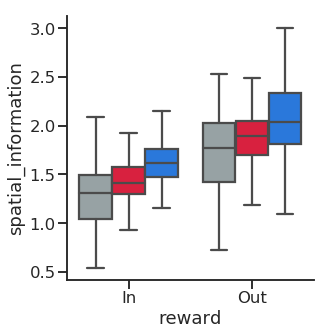

In [25]:
ax = sns.catplot(x='reward',y="spatial_information",hue="grp",
                kind="box",data=df_agg_roi,
                showfliers = False)

#(ax.set(xlabel='', 
#        ylabel='Place field correlation',
#        xticklabels=["Session 3 \n Day 3","Session 1 \n Day 4"])
#    ._legend.remove())

ax._legend.remove()

# Plot by Agg - Multiple

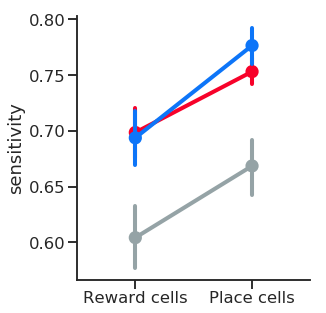

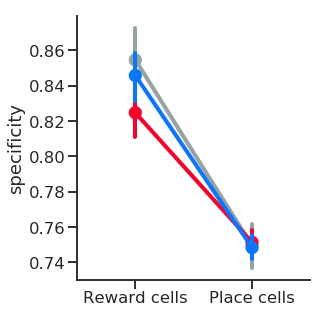

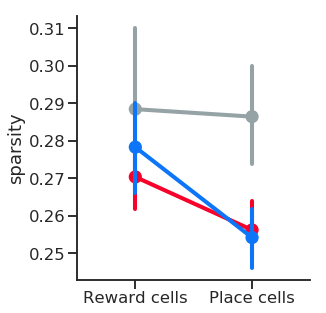

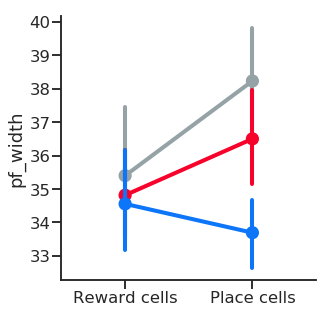

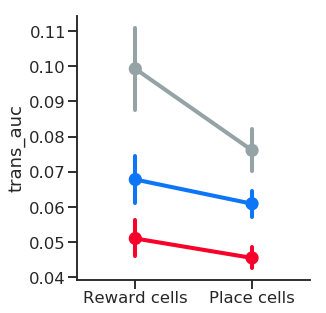

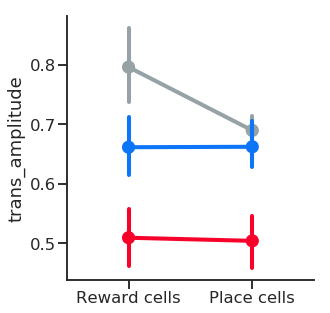

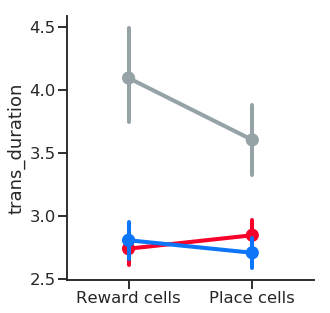

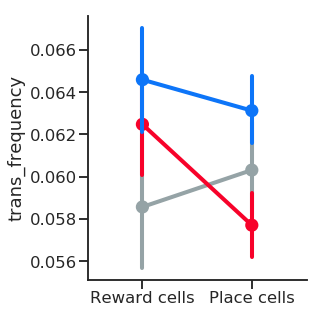

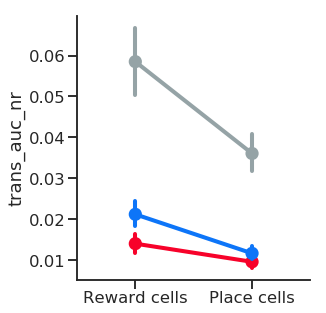

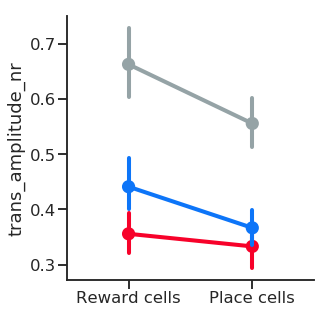

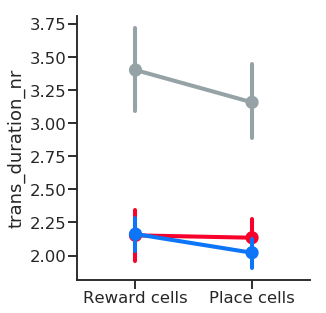

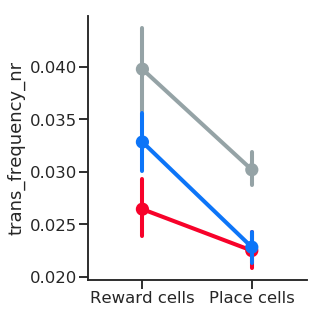

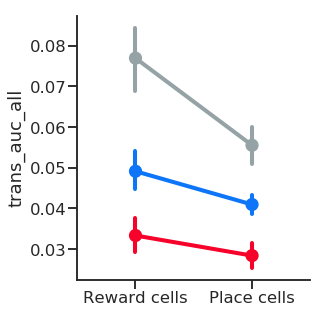

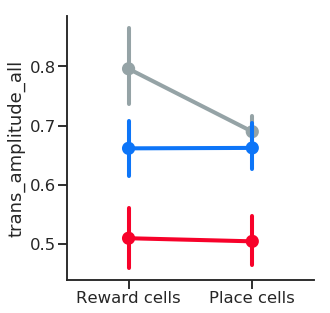

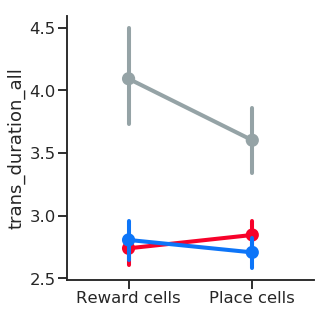

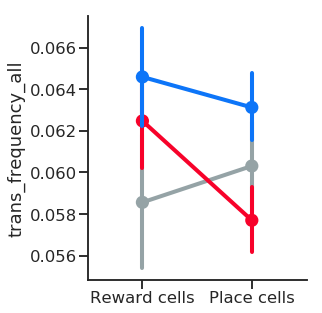

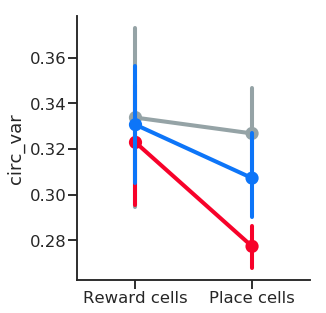

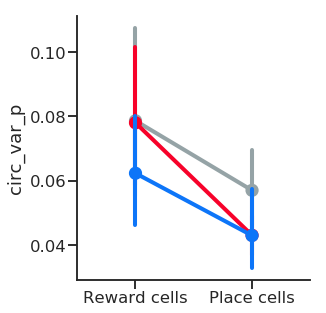

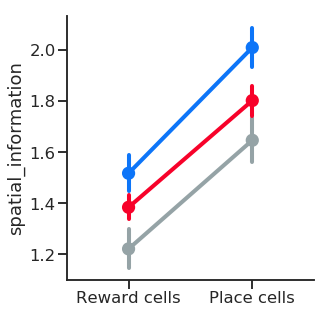

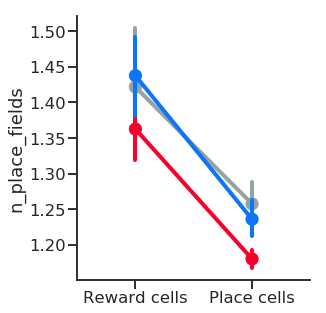

In [75]:
keys = ['sensitivity', 'specificity', 'sparsity',
 'pf_width', 'trans_auc', 'trans_amplitude', 'trans_duration',
 'trans_frequency', 'trans_auc_nr', 'trans_amplitude_nr', 'trans_duration_nr',
 'trans_frequency_nr', 'trans_auc_all', 'trans_amplitude_all',
 'trans_duration_all', 'trans_frequency_all', 'circ_var', 'circ_var_p',
 'spatial_information',
 'n_place_fields']

labels=keys

for key,label in zip(keys,labels):
    
    ax = sns.catplot(x='reward',y=key,hue="grp",
                kind="point",data=df_agg_roi)
    
    ax.set(xlabel='', ylabel=label,xticklabels=["Reward cells","Place cells"])
    sns.despine()
    ax._legend.remove()

# Plot by Agg - Facet

In [76]:
df_melt = pd.melt(df_agg_roi, id_vars =['grp',"reward",'trial_id'], value_vars =keys)
df_melt.columns

Index([u'grp', u'reward', u'trial_id', u'variable', u'value'], dtype='object')

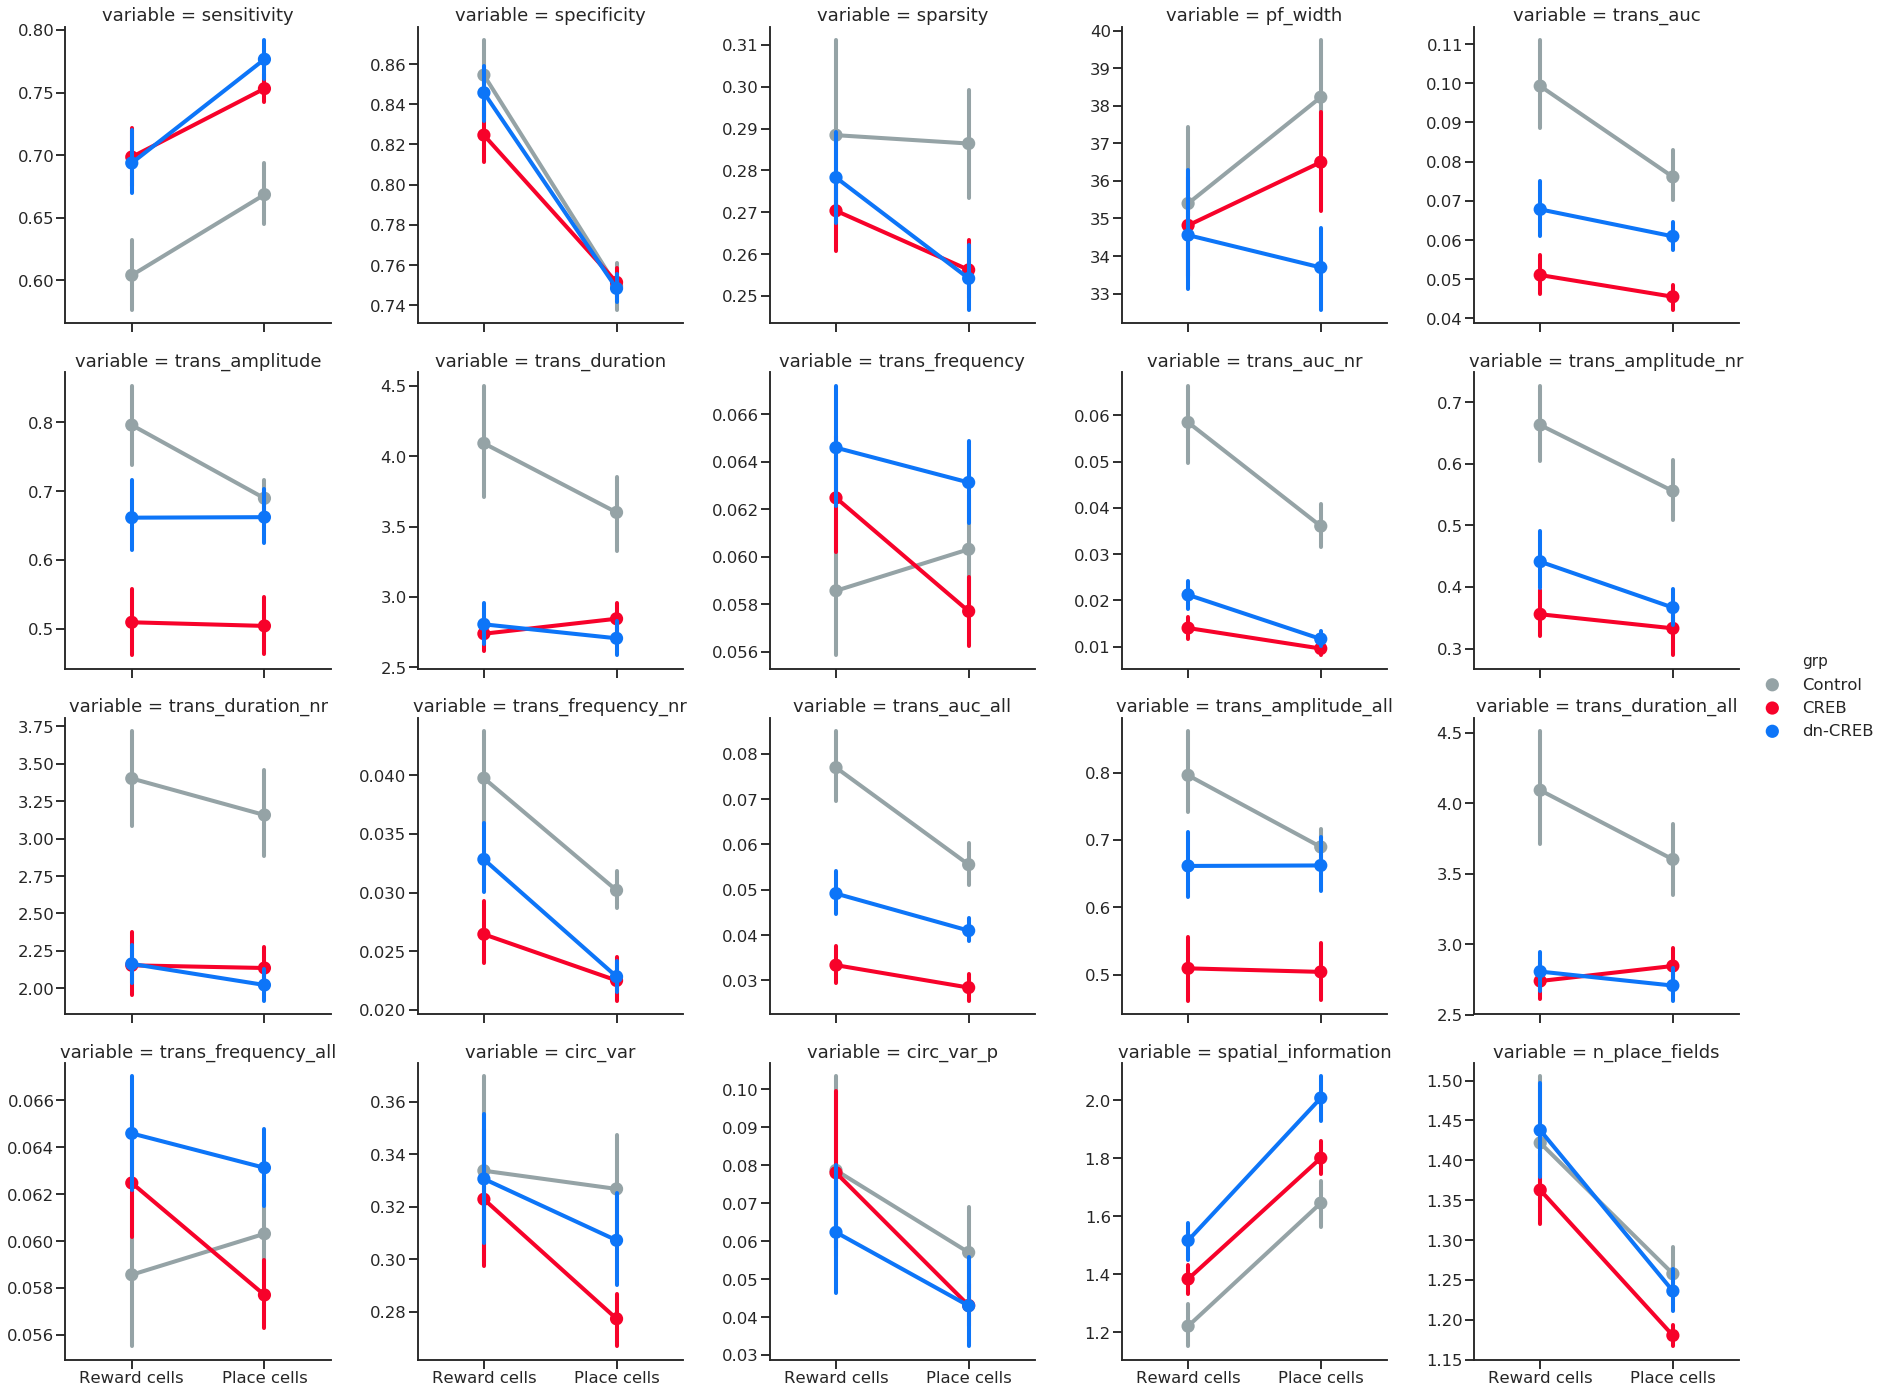

In [77]:
ax = sns.catplot(x="reward", y="value", hue="grp",
            col="variable", aspect=1,
            kind="point", data=df_melt,
           sharey=False,col_wrap=5);
ax.set(xlabel='', ylabel='',xticklabels=["Reward cells","Place cells"])

# Count of reward cell days

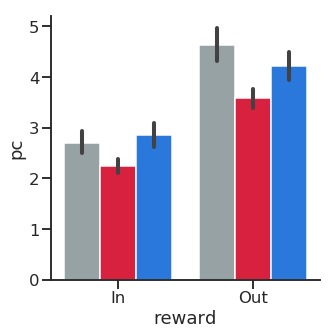

In [37]:
# Of the place cells, how many times were they just place cells, or also reward cells?

def n_sessions_active(df):
    df_n = df.groupby(['grp',"reward",'roi_label']).count()["pc"].reset_index()
    df_n = mjd.sort_df_by_group(df_n,col="grp")
    
    return df_n
    
    
df_n = n_sessions_active(df_roi)


#ax = sns.barplot(x="reward",y="pc",hue="expt_grp",data=df_n,ci=95)
ax = sns.catplot(x='reward',y="pc",hue="grp",
                kind="bar",data=df_n)
ax._legend.remove()

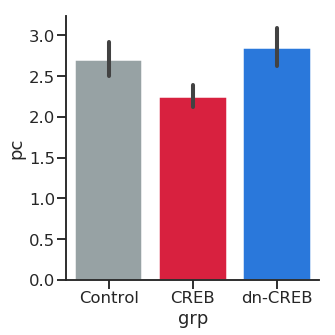

In [40]:
ax = sns.catplot(x="grp",y="pc",
                kind="bar",data=df_n.query("reward=='In'"))

# Reward by day

## resultant vector fraction

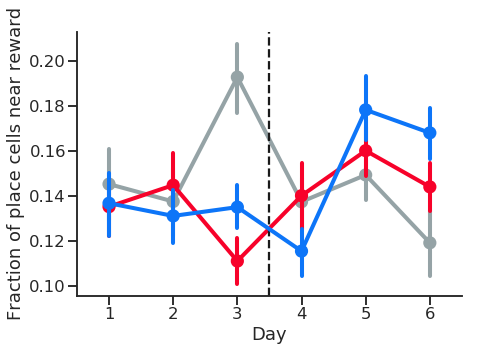

In [42]:
height,width = 5.,7
g = sns.catplot(x='day',y='fraction_near_rads_8',hue="grp",
                kind="point",data=df_agg,ci=68,heigth=height, aspect=width/height)

#\g.ax.axhline(expected_value, linestyle=':', color='k')
g._legend.remove()
g.set(xlabel='Day', ylabel='Fraction of place cells near reward',xticklabels=['1','2','3','4','5','6'])
g.ax.axvline(2.5, linestyle='--', color='k')

## activity centroid

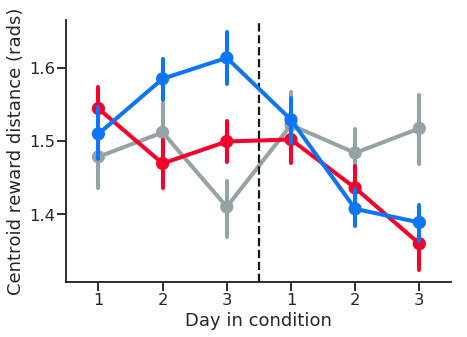

In [119]:

g = sns.catplot(x='day',y='activity_centroid_reward_distance',hue="grp",
                kind="point",data=df,ci=68,
                heigth=height, aspect=width/height)


#g.ax.axhline(expected_value, linestyle=':', color='k')
g._legend.remove()
g.set(xlabel='Day in condition', ylabel='Centroid reward distance (rads)',xticklabels=['1','2','3','1','2','3'])
g.ax.axvline(2.5, linestyle='--', color='k')

In [120]:
g.savefig('figs/F16-reward-centroid-dist-over-days.svg')

In [124]:
%%R -i df
am2 <-aov(activity_centroid_reward_distance ~ (grp*day) + Error(mouseID/(day)), data = df)

print(summary(am2))


Error: mouseID
          Df Sum Sq Mean Sq F value  Pr(>F)   
grp        2 0.0485 0.02424   2.326 0.17867   
day        5 0.0908 0.01817   1.743 0.25847   
grp:day    2 0.5039 0.25195  24.180 0.00134 **
Residuals  6 0.0625 0.01042                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Error: mouseID:day
          Df Sum Sq Mean Sq F value Pr(>F)  
day        5 0.3574 0.07147   2.045 0.0846 .
grp:day   10 0.6160 0.06160   1.763 0.0868 .
Residuals 62 2.1670 0.03495                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Error: Within
           Df Sum Sq Mean Sq F value Pr(>F)
Residuals 174  2.189 0.01258               


In [126]:
%%R -i df
am2 <-aov(activity_centroid_reward_distance ~ grp*day,data = df)

print(summary(am2))

             Df Sum Sq Mean Sq F value   Pr(>F)    
grp           2  0.048 0.02424   1.215 0.298516    
day           5  0.390 0.07802   3.910 0.001979 ** 
grp:day      10  0.628 0.06279   3.147 0.000825 ***
Residuals   249  4.969 0.01995                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [133]:
for n,g in df.groupby("day"):
    
    print_header(n,'day')
    stats.full_anova(g,ind_vars=['grp'],dep_var='activity_centroid_reward_distance')


********************
day: 1
********************

# Formula: activity_centroid_reward_distance~C(grp)
# grp: set(['Control', 'CREB', 'dn-CREB'])

                          Results: Ordinary least squares
Model:              OLS                               Adj. R-squared:     -0.007  
Dependent Variable: activity_centroid_reward_distance AIC:                -44.2138
Date:               2020-01-30 13:46                  BIC:                -38.7279
No. Observations:   46                                Log-Likelihood:     25.107  
Df Model:           2                                 F-statistic:        0.8509  
Df Residuals:       43                                Prob (F-statistic): 0.434   
R-squared:          0.038                             Scale:              0.021025
-------------------------------------------------------------------------------------
                         Coef.     Std.Err.       t       P>|t|      [0.025    0.975]
------------------------------------------

## fraction near 10


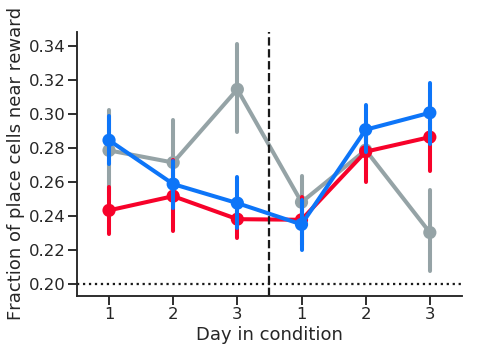

In [86]:
expected_value = 2 * .1

# for direct reward
height,width = 5.,7
g = sns.catplot(x='day',y='fraction_near_norm_10',hue="grp",
                kind="point",data=df,ci=68,heigth=height, aspect=width/height)

g.ax.axhline(expected_value, linestyle=':', color='k')
g._legend.remove()
g.set(xlabel='Day in condition', ylabel='Fraction of place cells near reward',xticklabels=['1','2','3','1','2','3'])
g.ax.axvline(2.5, linestyle='--', color='k')

## fraction near 05
used two-anova, rather than mixed effects linear model; not sure if correctly deployed anyhow.

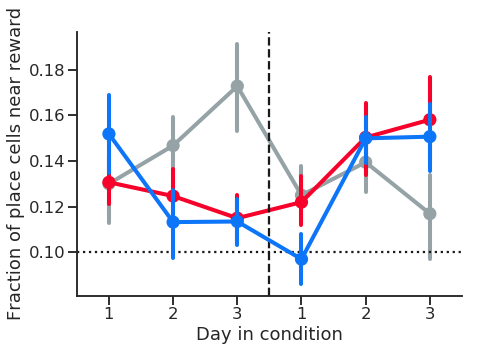

In [54]:
expected_value = 2 * .05

# for direct reward
height,width = 5.,7
g = sns.catplot(x='day',y='fraction_near_norm_05',hue="grp",
                kind="point",data=df,ci=68,heigth=height, aspect=width/height)

g.ax.axhline(expected_value, linestyle=':', color='k')
g._legend.remove()
g.set(xlabel='Day in condition', ylabel='Fraction of place cells near reward',xticklabels=['1','2','3','1','2','3'])
g.ax.axvline(2.5, linestyle='--', color='k')

In [79]:
g.savefig('figs/F15-reward-fract-over-days.svg')

In [134]:
%%R -i df
am2 <-aov(fraction_near_norm_05 ~ grp*day,data = df)

print(summary(am2))

             Df Sum Sq  Mean Sq F value Pr(>F)  
grp           2 0.0035 0.001756   0.571 0.5658  
day           5 0.0264 0.005274   1.715 0.1317  
grp:day      10 0.0642 0.006424   2.088 0.0259 *
Residuals   249 0.7660 0.003076                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [137]:
%%R -i df
am2 <-aov(fraction_near_norm_05 ~ (grp*day) + Error(mouseID/(day)), data = df)

print(summary(am2))


Error: mouseID
          Df  Sum Sq  Mean Sq F value Pr(>F)
grp        2 0.00351 0.001756   0.320  0.738
day        5 0.01480 0.002960   0.540  0.742
grp:day    2 0.01602 0.008011   1.461  0.304
Residuals  6 0.03291 0.005485               

Error: mouseID:day
          Df  Sum Sq  Mean Sq F value Pr(>F)
day        5 0.02670 0.005340   1.165  0.337
grp:day   10 0.06421 0.006421   1.401  0.201
Residuals 62 0.28424 0.004585               

Error: Within
           Df Sum Sq  Mean Sq F value Pr(>F)
Residuals 174 0.4177 0.002401               


In [138]:
for n,g in df.groupby("day"):
    
    print_header(n,'day')
    stats.full_anova(g,ind_vars=['grp'],dep_var='fraction_near_norm_05')


********************
day: 1
********************

# Formula: fraction_near_norm_05~C(grp)
# grp: set(['Control', 'CREB', 'dn-CREB'])

                    Results: Ordinary least squares
Model:              OLS                   Adj. R-squared:     -0.019   
Dependent Variable: fraction_near_norm_05 AIC:                -123.2072
Date:               2020-01-30 17:15      BIC:                -117.7212
No. Observations:   46                    Log-Likelihood:     64.604   
Df Model:           2                     F-statistic:        0.5710   
Df Residuals:       43                    Prob (F-statistic): 0.569    
R-squared:          0.026                 Scale:              0.0037753
------------------------------------------------------------------------
                       Coef.   Std.Err.    t     P>|t|    [0.025  0.975]
------------------------------------------------------------------------
Intercept              0.1300    0.0159  8.1969  0.0000   0.0980  0.1620
C(grp)[T.CREB]   

## condition

In [80]:
%%R -i df1
am2 <-aov(fraction_near_norm_05 ~ (grp*day) + Error(mouseID/(day)), data = df1)

print(summary(am2))


Error: mouseID
          Df  Sum Sq  Mean Sq F value Pr(>F)
grp        2 0.01849 0.009246   2.643  0.125
day        2 0.01866 0.009331   2.667  0.123
grp:day    2 0.01408 0.007040   2.012  0.190
Residuals  9 0.03149 0.003498               

Error: mouseID:day
          Df  Sum Sq  Mean Sq F value Pr(>F)
day        2 0.00099 0.000497   0.128  0.880
grp:day    4 0.02680 0.006700   1.727  0.176
Residuals 25 0.09699 0.003879               

Error: Within
          Df Sum Sq  Mean Sq F value Pr(>F)
Residuals 90 0.2401 0.002668               


In [77]:
%%R -i df2
am2 <-aov(fraction_near_norm_05 ~ (grp*day) + Error(mouseID/(day)), data = df2)

print(summary(am2))


Error: mouseID
          Df  Sum Sq  Mean Sq F value Pr(>F)
grp        2 0.00577 0.002886   0.252  0.783
day        2 0.00327 0.001637   0.143  0.869
grp:day    2 0.00295 0.001477   0.129  0.881
Residuals  9 0.10327 0.011474               

Error: mouseID:day
          Df  Sum Sq  Mean Sq F value Pr(>F)  
day        2 0.02268 0.011339   3.354 0.0519 .
grp:day    4 0.01563 0.003906   1.156 0.3549  
Residuals 24 0.08113 0.003381                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Error: Within
          Df Sum Sq  Mean Sq F value Pr(>F)
Residuals 84 0.1776 0.002115               


## aggregate

In [ ]:
df_agg = df.groupby(["grp","mouseID","day_in_df"]).mean().reset_index()

In [49]:
%%R -i df_agg
am2 <-aov(value ~ (grp*day_in_df) + Error(mouseID/(day_in_df)), data = df_agg)

print(summary(am2))


Error: mouseID
              Df   Sum Sq   Mean Sq F value Pr(>F)
grp            2 0.000868 0.0004338   0.256  0.779
day_in_df      1 0.001095 0.0010950   0.646  0.438
grp:day_in_df  1 0.001645 0.0016453   0.971  0.346
Residuals     11 0.018639 0.0016944               

Error: mouseID:day_in_df
              Df  Sum Sq  Mean Sq F value Pr(>F)
day_in_df      1 0.00056 0.000559   0.166  0.690
grp:day_in_df  2 0.00420 0.002102   0.625  0.551
Residuals     13 0.04374 0.003364               

Error: Within
          Df Sum Sq Mean Sq F value Pr(>F)
Residuals 61 0.0903 0.00148               


# percent reward cells

/home/matt/anaconda2/lib/python2.7/site-packages/seaborn/categorical.py:3692: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


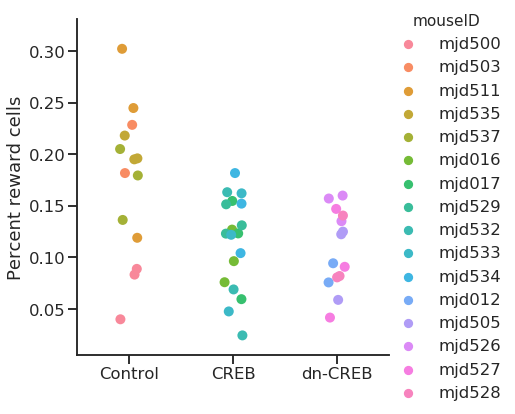

In [44]:

dfd3=df[df.day_in_df == 2]
ax = sns.catplot(x="grp",y="value",hue="mouseID",data=dfd3,size=6,s=10)
ax.set(xlabel='', ylabel='Percent reward cells')

/home/matt/anaconda2/lib/python2.7/site-packages/seaborn/categorical.py:3692: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


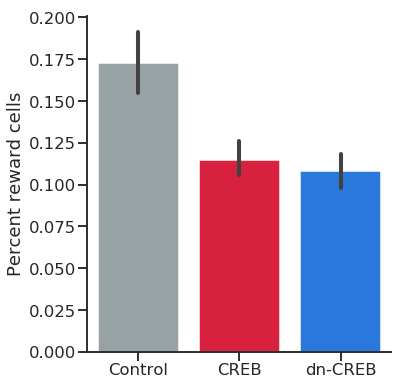

In [49]:
dfd3=df[df.day_in_df == 2]
ax = sns.catplot(x="grp",y="value",kind='bar',data=dfd3,ci=68,size=6)
ax.set(xlabel='', ylabel='Percent reward cells')

# count of reward cells in both conditons

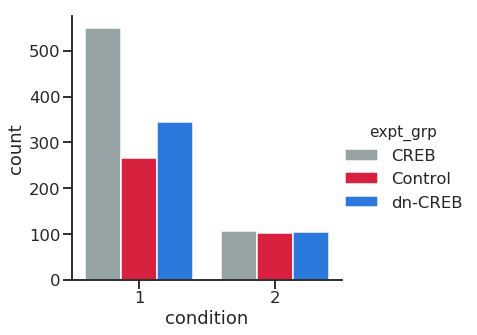

In [39]:
df_rew = df[df["reward"]==1]

df_cond_count=df_rew.groupby(["expt_grp","roi_label","condition"]).count().reset_index()
df_c=df_cond_count.groupby(["expt_grp","roi_label"]).count().reset_index()

ax = sns.catplot(x='condition',hue="expt_grp",
                kind="count",data=df_c)

# Just day 3, session 2 + 3

In [43]:
df_roi.columns


threshold = -.1

df_roi["reward"]=pd.cut(df_roi['centroid_reward_distance'],
       bins=[-1,threshold,0,1], 
       labels=['nrb','1','nra'])

df_roi.groupby("reward").count()

#df.loc[(df["condition"]=='1') & (df["day"]=='4')]

df_roi = df_roi.loc[(df_roi.session.isin([2,3])) & (df_roi.day ==3) & (df_roi.reward =='1')]

df_s3 = df_roi[df_roi.session==3].reset_index()
df_s2 = df_roi[df_roi.session==2].reset_index()
df_merge = pd.merge(df_s3,df_s2,on="roi_label")
df_merge.shape

(48, 83)

In [54]:
df_c = df_roi.groupby(["expt_grp","roi_label"]).count().reset_index()
df_c.groupby(["expt_grp","pf_width"]).count()

roi_label  Unnamed: 0  Unnamed: 0.1  Unnamed: 0.1.1  pc  \
expt_grp pf_width                                                            
CREB     1                54          54            54              54  54   
         2                13          13            13              13  13   
Control  1                33          33            33              33  33   
         2                23          23            23              23  23   
dn-CREB  1                49          49            49              49  49   
         2                12          12            12              12  12   

                   sensitivity  specificity  sparsity  trans_auc  \
expt_grp pf_width                                                  
CREB     1                  54           54        54         54   
         2                  13           13        13         13   
Control  1                  33           33        33         33   
         2                  23           23        23         23   
dn-CREB  1                  49           49        49         49   
         2                  12           12        12         12   

                   trans_amplitude  ...  centroid_reward_distance  trial_id  \
expt_grp pf_width                   ...                                       
CREB     1                      54  ...                        54        54   
         2                      13  ...                        13        13   
Control  1                      33  ...                        33        33   
         2                      23  ...                        23        23   
dn-CREB  1                      49  ...                        49        49   
         2                      12  ...                        12        12   

                   condition  day  session  experimentType  startTime  \
expt_grp pf_width                                                       
CREB     1                54   54       54              54         54   
         2                13   13       13              13         13   
Control  1                33   33       33              33         33   
         2                23   23       23              23         23   
dn-CREB  1                49   49       49              49         49   
         2                12   12       12              12         12   

                   mouseID  session_day  reward  
expt_grp pf_width                                
CREB     1              54           54      54  
         2              13           13      13  
Control  1              33           33      33  
         2              23           23      23  
dn-CREB  1              49           49      49  
         2              12           12      12  

[6 rows x 39 columns]

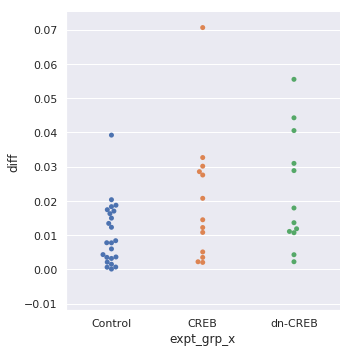

In [45]:
df_merge["diff"] = df_merge.centroid_reward_distance_x - df_merge.centroid_reward_distance_y
df_merge["diff"] = df_merge["diff"].abs()

ax = sns.catplot(x='expt_grp_x',y="diff",hue="expt_grp_x",
                kind="swarm",data=df_merge)

# Auto figs 2019

/home/matt/code/analysis/lab/plotting/plotting_helpers.py:1186: FutureWarning: Interpreting tuple 'by' as a list of keys, rather than a single key. Use 'by=[...]' instead of 'by=(...)'. In the future, a tuple will always mean a single key.
  for group_key, group in dataframe.groupby(plotby):


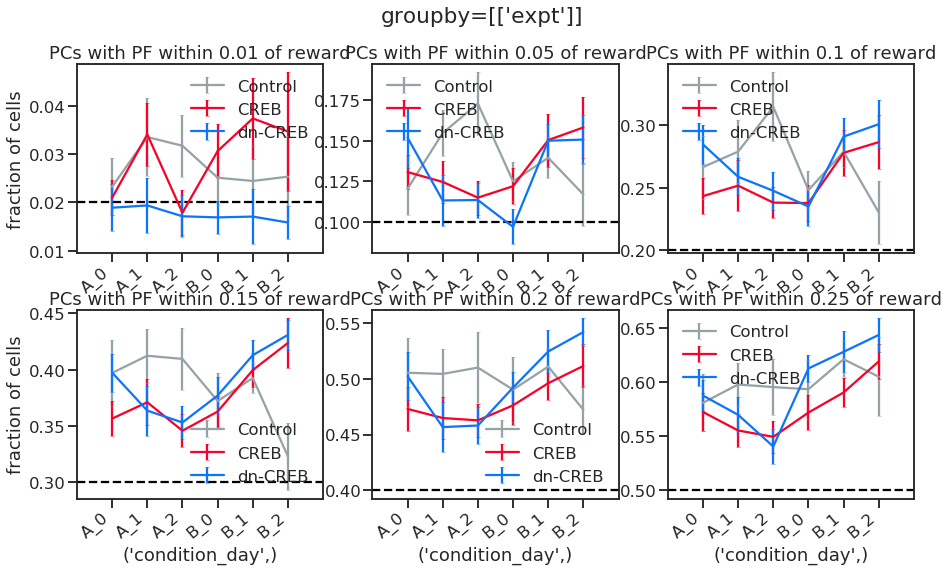

In [82]:
data1= pcf.place_to_reward_fraction_figure(
        exptGrps, roi_filters=roi_filters,            
        groupby=[['expt']], plotby=('condition_day',), orderby=None,
        method='centroid', label_every_n=1, colors=colors)
plt.show()

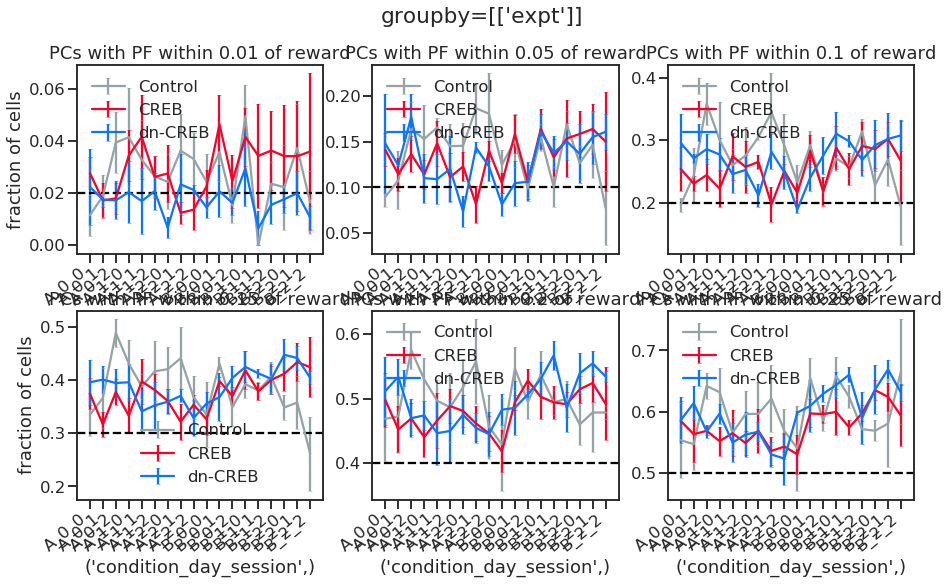

In [85]:
data1= pcf.place_to_reward_fraction_figure(
        exptGrps, roi_filters=roi_filters,
        groupby=[['expt']], plotby=('condition_day_session',), orderby=None,
        method='centroid', label_every_n=1, colors=colors)
plt.show()

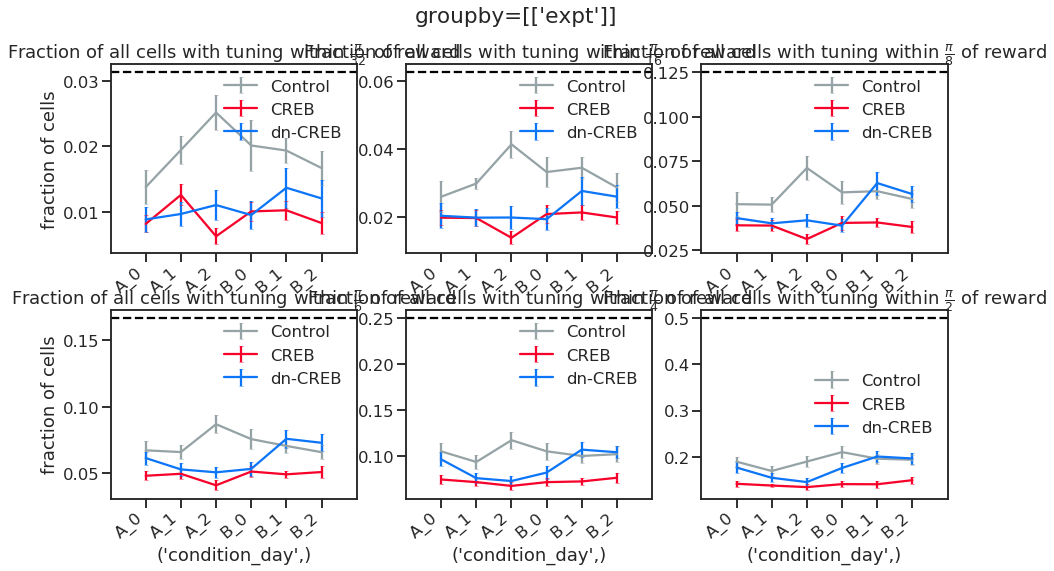

In [83]:
data2= pcf.place_to_reward_fraction_figure(
        exptGrps, roi_filters=roi_filters,
        groupby=[['expt']], plotby=('condition_day',), orderby=None,
        method='resultant_vector', label_every_n=1,colors=colors)
plt.show()

/home/matt/code/analysis/lab/misc/analysis_helpers.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  'rewardPositions'].apply(lambda x: float(x[0]))
/home/matt/code/analysis/lab/plotting/plotting_helpers.py:779: FutureWarning: Interpreting tuple 'by' as a list of keys, rather than a single key. Use 'by=[...]' instead of 'by=(...)'. In the future, a tuple will always mean a single key.
  grouped = dataframe.groupby(plotby)


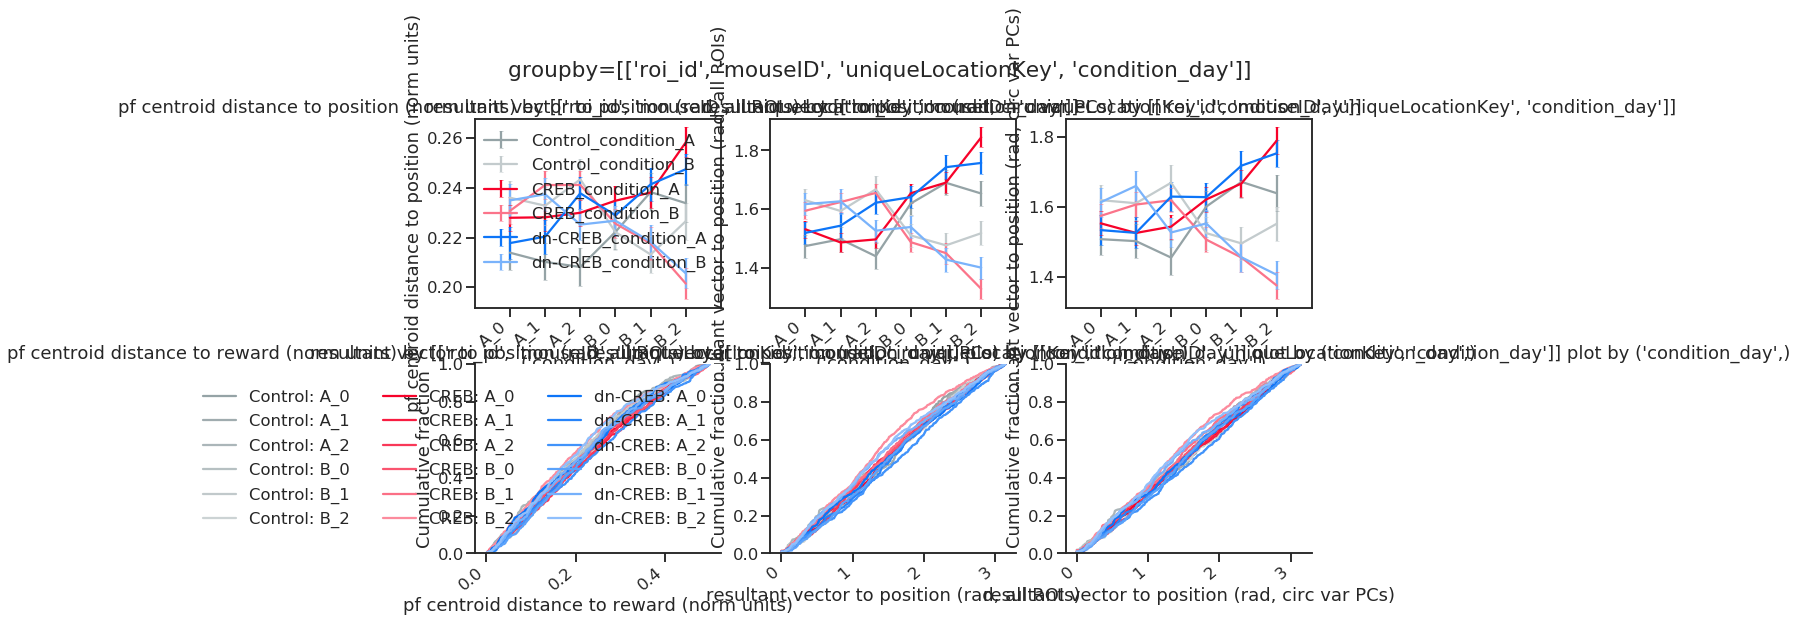

In [84]:
data3=pcf.place_field_reward_remapping_figure(
        exptGrps, roi_filters=roi_filters, groupby=[['roi_id', 'mouseID', 'uniqueLocationKey', 'condition_day']],
        plotby=('condition_day',),
        label_every_n=1,colors=colors)
plt.show()

# Autofig 2020

/home/matt/code/analysis/lab/plotting/plotting_helpers.py:1186: FutureWarning: Interpreting tuple 'by' as a list of keys, rather than a single key. Use 'by=[...]' instead of 'by=(...)'. In the future, a tuple will always mean a single key.
  for group_key, group in dataframe.groupby(plotby):


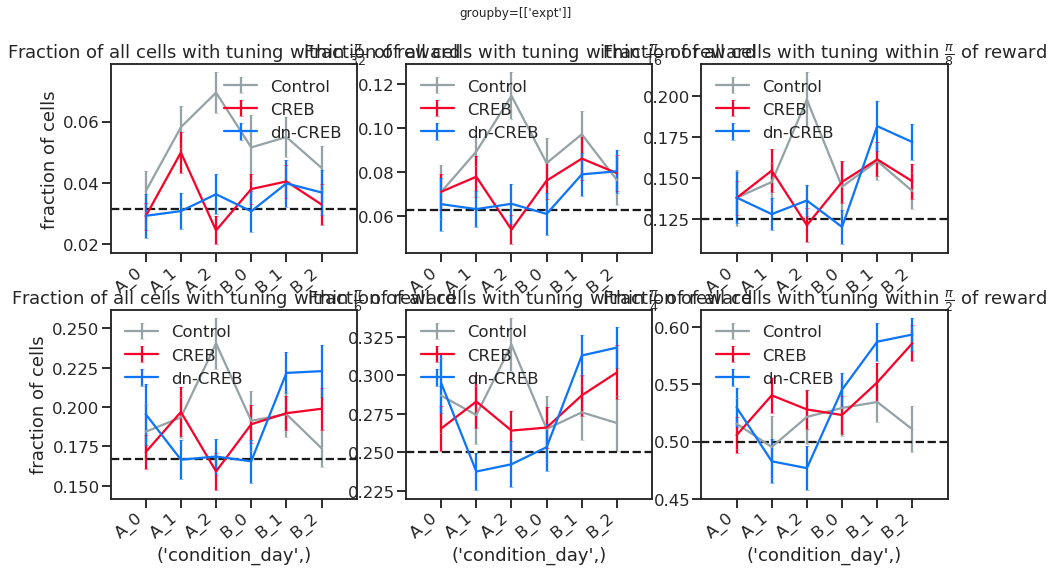

In [13]:
data2= pcf.place_to_reward_fraction_figure(
        exptGrps, roi_filters=roi_filters,
        groupby=[['expt']], plotby=('condition_day',), orderby=None,
        method='resultant_vector', label_every_n=1,colors=colors)
plt.show()

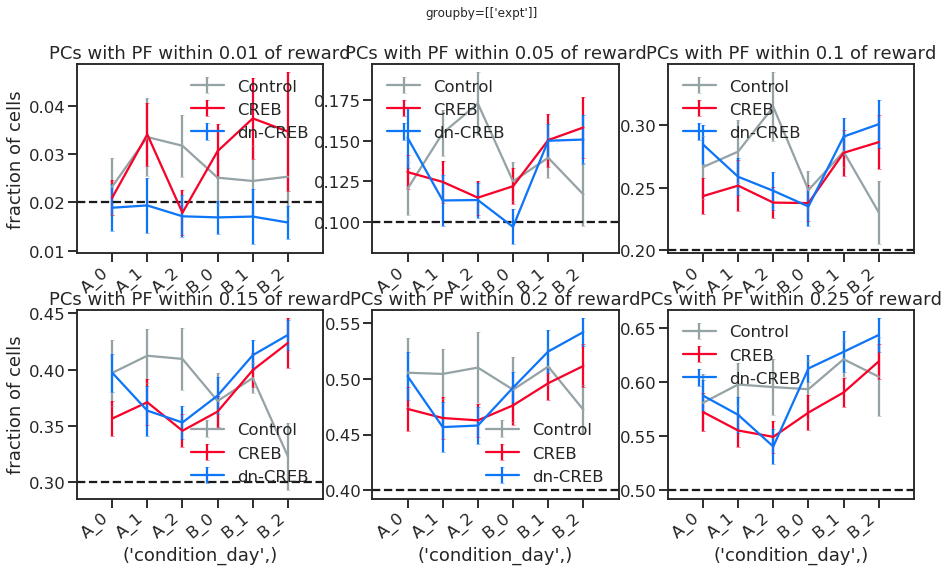

In [14]:
data2= pcf.place_to_reward_fraction_figure(
        exptGrps, roi_filters=roi_filters,
        groupby=[['expt']], plotby=('condition_day',), orderby=None,
        method='centroid', label_every_n=1,colors=colors)
plt.show()

/home/matt/code/analysis/lab/misc/analysis_helpers.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  'rewardPositions'].apply(lambda x: float(x[0]))
/home/matt/code/analysis/lab/plotting/plotting_helpers.py:779: FutureWarning: Interpreting tuple 'by' as a list of keys, rather than a single key. Use 'by=[...]' instead of 'by=(...)'. In the future, a tuple will always mean a single key.
  grouped = dataframe.groupby(plotby)


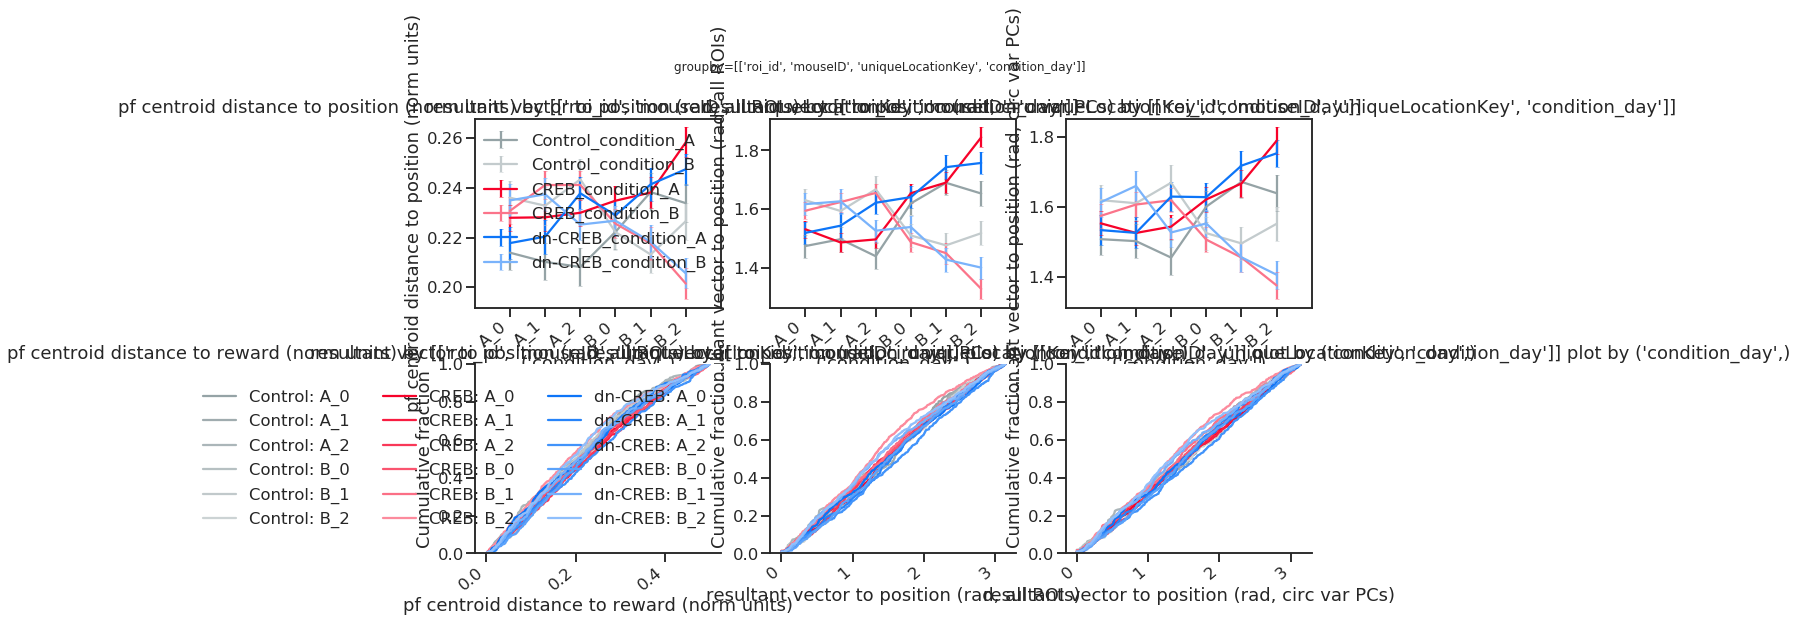

In [15]:
data3=pcf.place_field_reward_remapping_figure(
        exptGrps, roi_filters=roi_filters, groupby=[['roi_id', 'mouseID', 'uniqueLocationKey', 'condition_day']],
        plotby=('condition_day',),
        label_every_n=1,colors=colors)
plt.show()

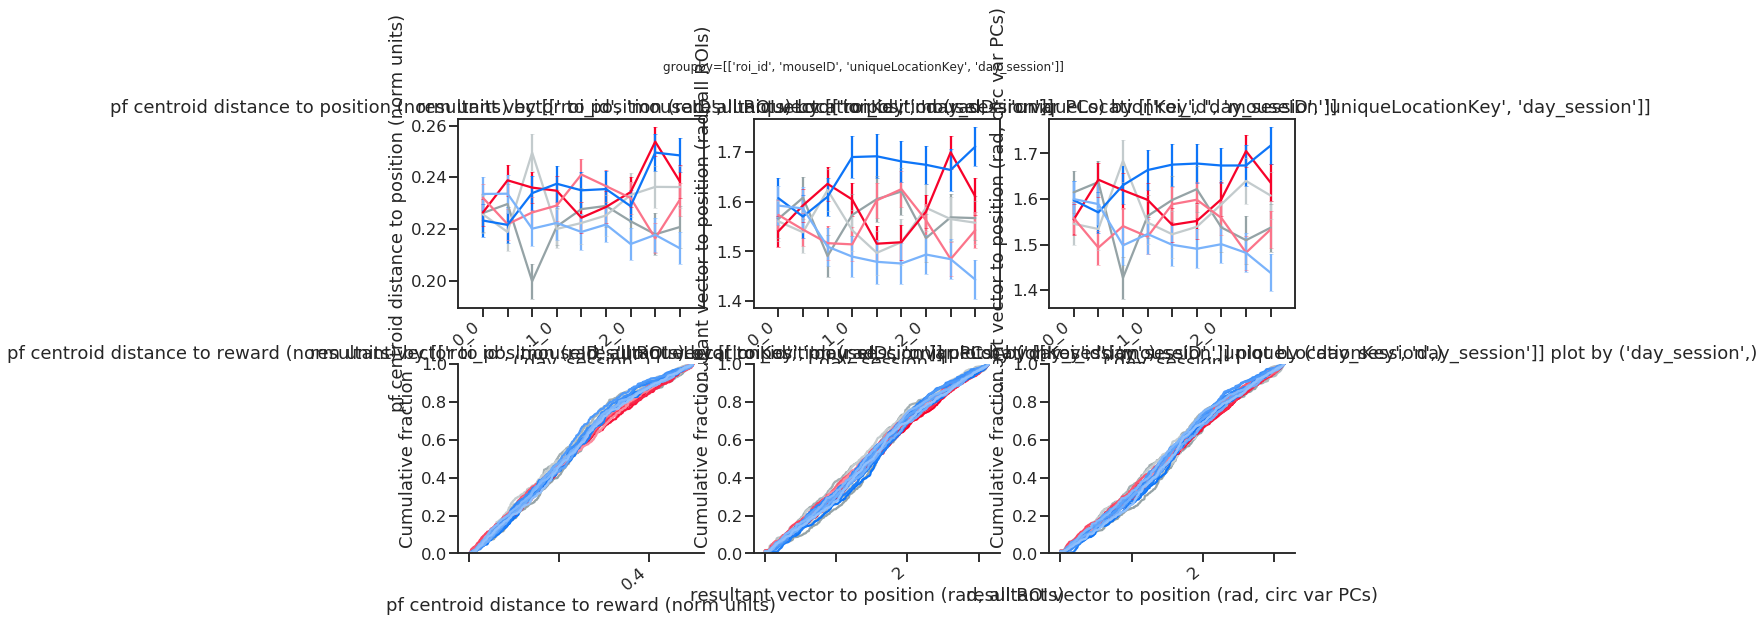

In [17]:
data3=pcf.place_field_reward_remapping_figure(
        exptGrps, roi_filters=roi_filters, groupby=[['roi_id', 'mouseID', 'uniqueLocationKey', 'day_session']],
        plotby=('day_session',),
        label_every_n=3,colors=colors)
plt.show()

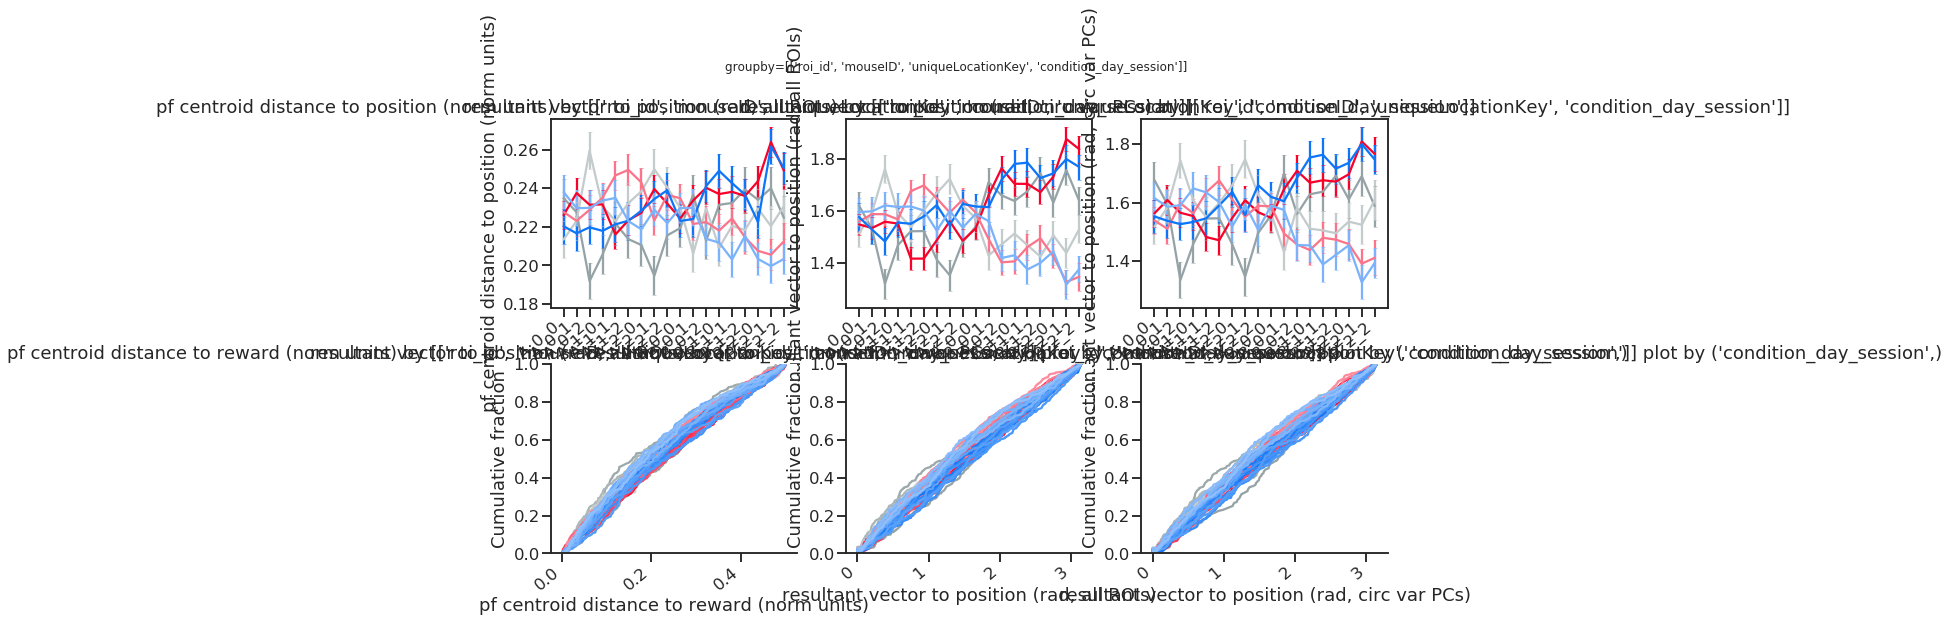

In [20]:
data3=pcf.place_field_reward_remapping_figure(
        exptGrps, roi_filters=roi_filters, groupby=[['roi_id', 'mouseID', 'uniqueLocationKey', 'condition_day_session']],
        plotby=('condition_day_session',),
        label_every_n=1,colors=colors)
plt.show()

### reward shiftness

/home/matt/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


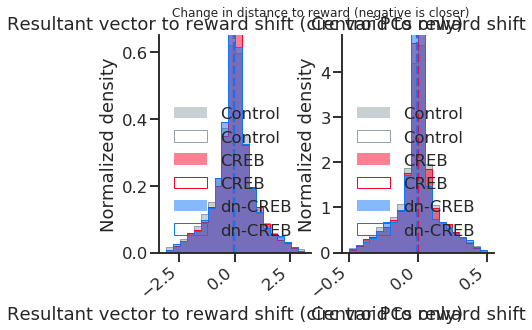

In [22]:
data4 = pcf.rewardness_shift_figure(exptGrps)

Control: A
Control: B
CREB: A
CREB: B
dn-CREB: A
dn-CREB: B


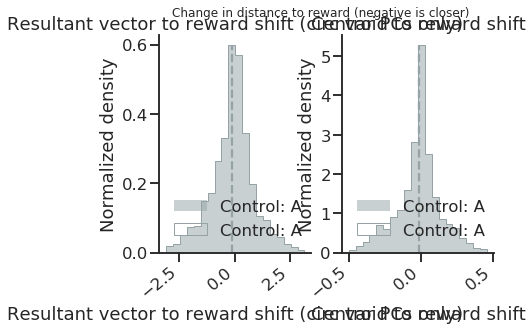

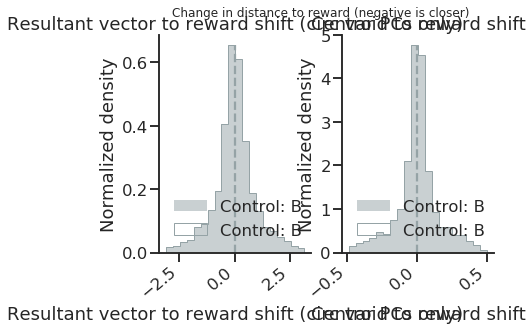

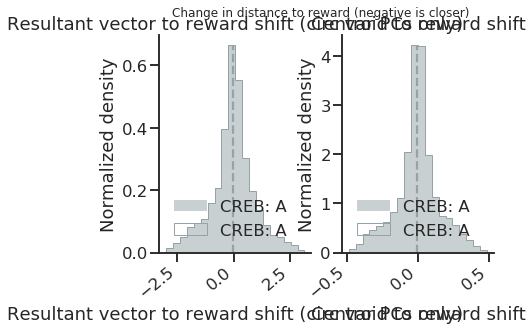

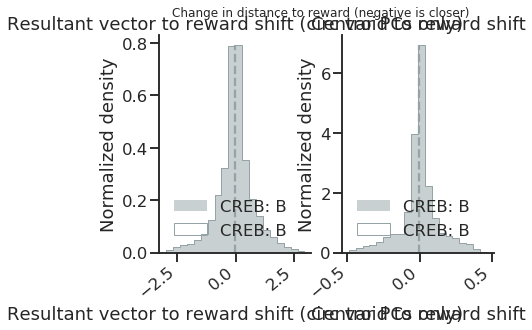

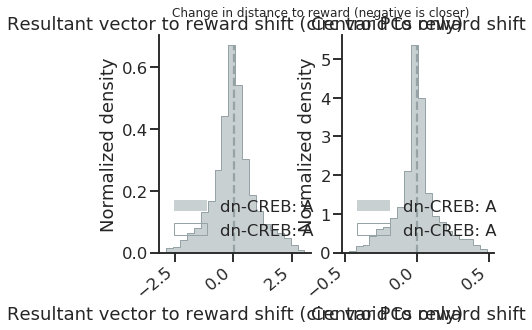

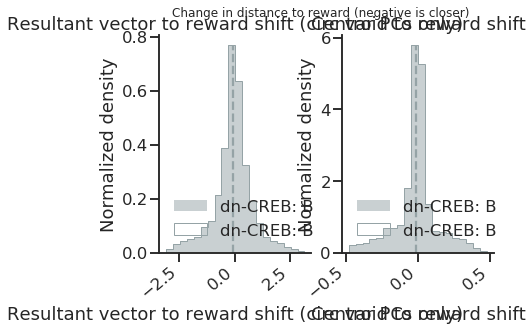

In [38]:

for grp in exptGrps:
    for n, gg in grp.groupby(["condition"]):
        print(gg.label())
        pcf.rewardness_shift_figure([gg])

### place field density

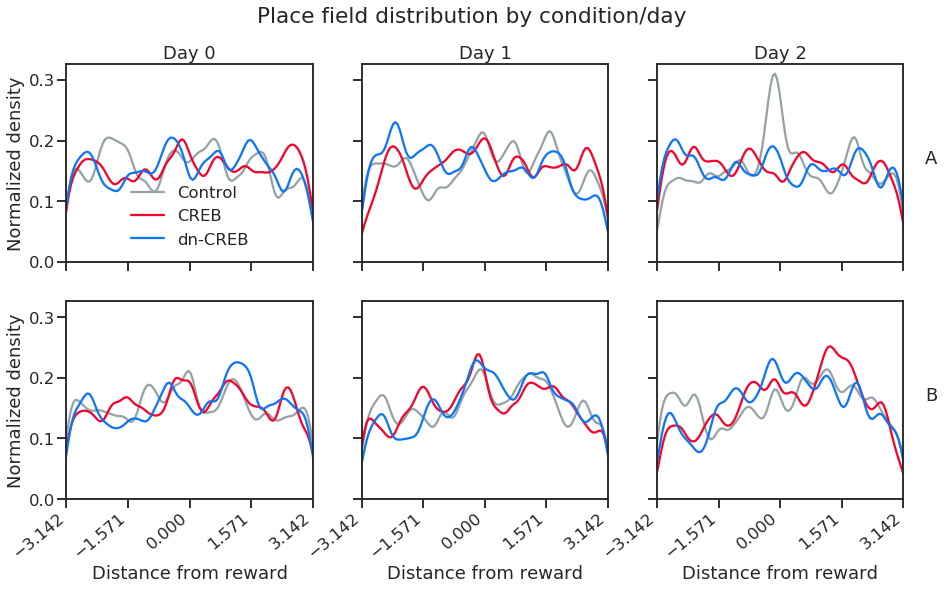

In [114]:
g = pcf.hidden_rewards_place_field_distribution_density_figure(exptGrps,bw=.15)
g.axes[0].set(xticks=[-np.pi, -np.pi/2,  0, np.pi/2, np.pi])
plt.show()

In [115]:
g.savefig('figs/F15-pf-density-bw15.svg')

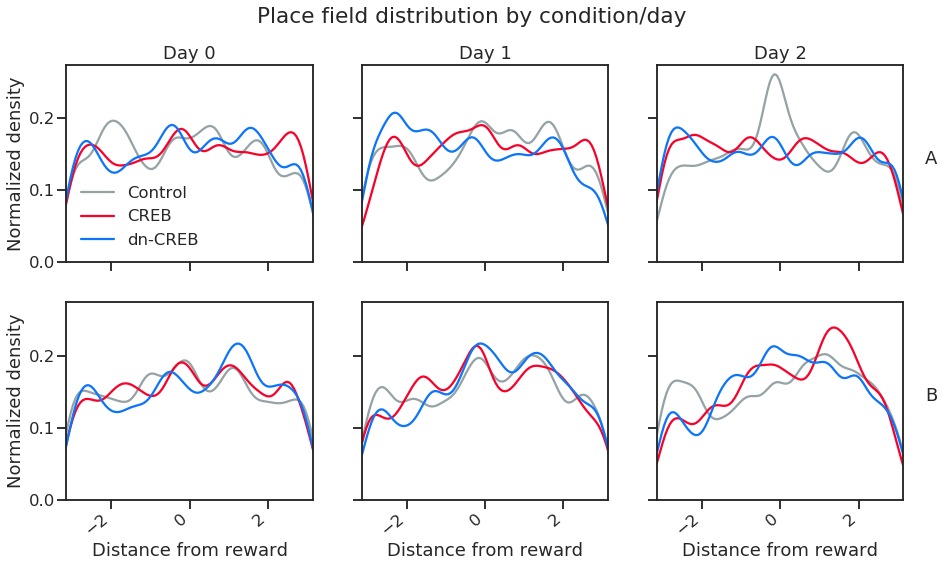

In [116]:
pcf.hidden_rewards_place_field_distribution_density_figure(exptGrps,bw=.25)
plt.show()

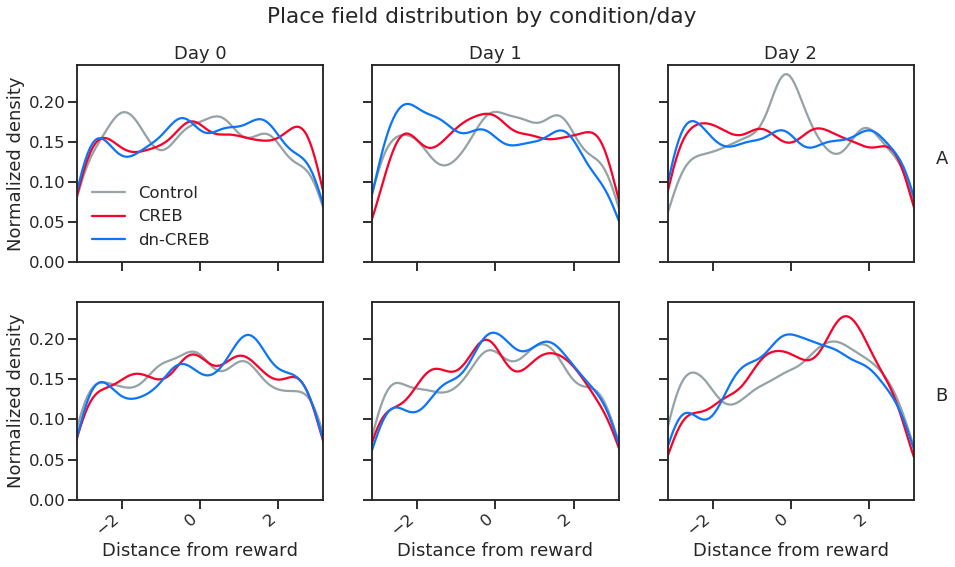

In [117]:
pcf.hidden_rewards_place_field_distribution_density_figure(exptGrps,bw=.35)
plt.show()

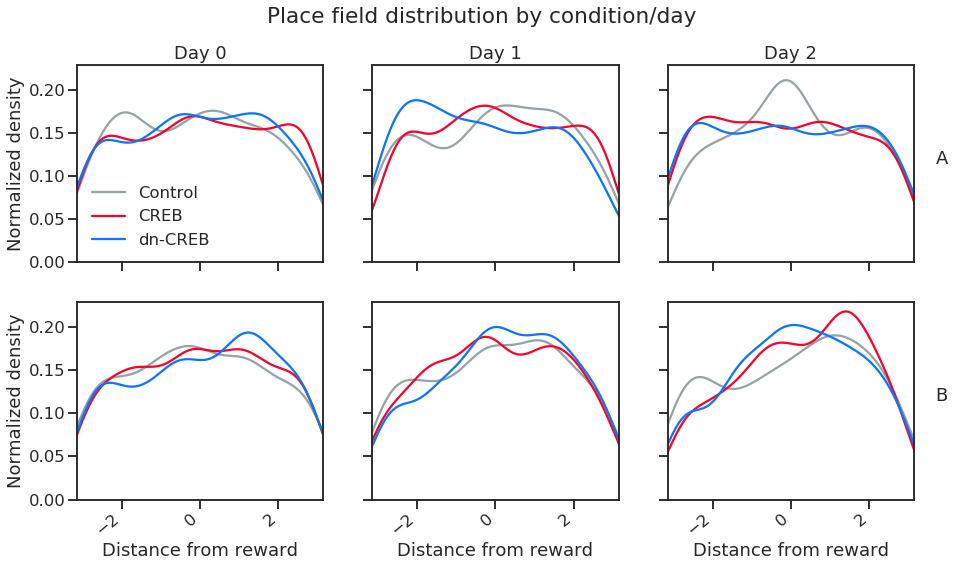

In [118]:
pcf.hidden_rewards_place_field_distribution_density_figure(exptGrps) # default bw is.....
plt.show()

### as histogram
need to modify codebase to produce

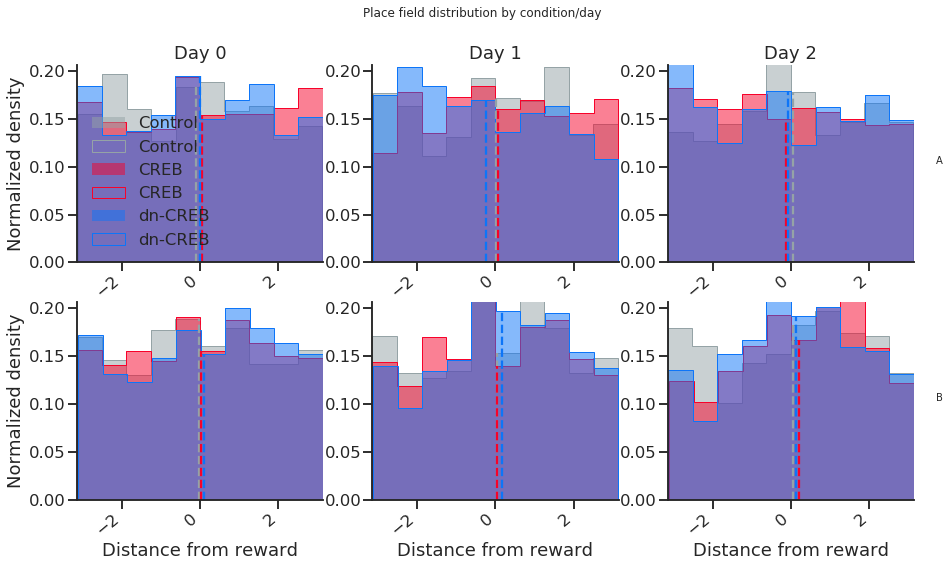

In [40]:
pcf.hidden_rewards_place_field_distribution_density_figure(exptGrps)
plt.show()

Plotting of mean_resultant_vector_to_position_angle failed
Unknown property bw
Plotting of mean_resultant_vector_to_position_angle failed
Unknown property bw
Plotting of mean_resultant_vector_to_position_angle failed
Unknown property bw
Plotting of mean_resultant_vector_to_position_angle failed
Unknown property bw
Plotting of mean_resultant_vector_to_position_angle failed
Unknown property bw
Plotting of mean_resultant_vector_to_position_angle failed
Unknown property bw


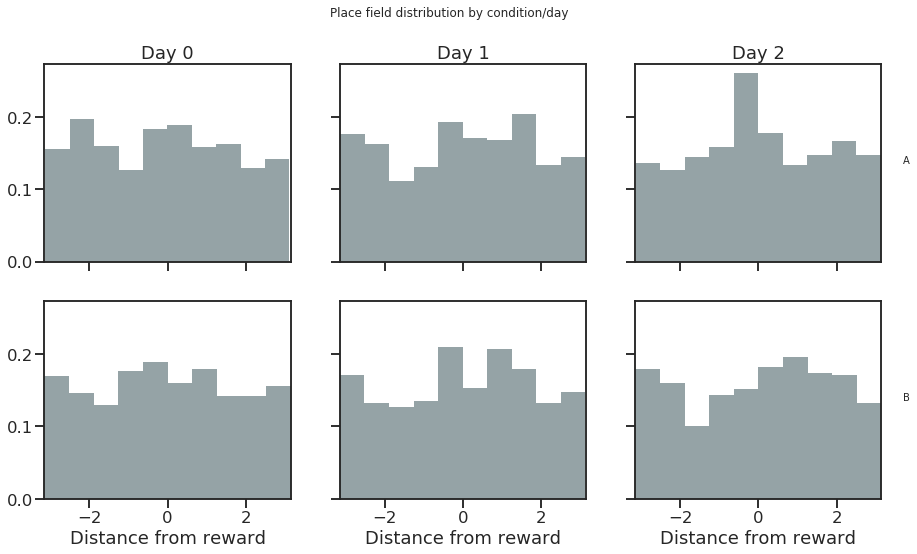

In [41]:
pcf.hidden_rewards_place_field_distribution_density_figure(exptGrps,bw=.15)
plt.show()

# Autofig + plot returned data

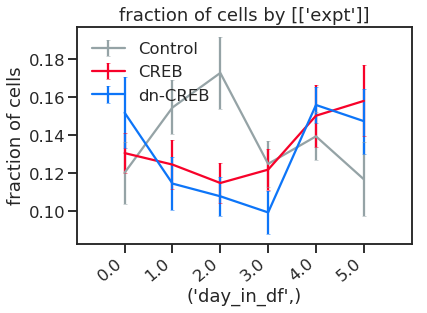

In [85]:
import lab.figures.place_cell_figures as pcf
threshold = 0.05 
# direct reward figure
fig,ax  = plt.subplots(1)
activity_kwargs = {'method': 'centroid', 'positions': 'reward','threshold':threshold}
expected_value = 2 * threshold
agg_fn = np.mean
groupby = [['expt']]


data = plot_metric(ax, exptGrps, metric_fn=place.centroid_to_position_threshold,
            roi_filters=roi_filters, groupby=groupby, plotby= ('day_in_df',), 
            agg_fn=agg_fn, plot_abs=False, plot_method='line',
            activity_kwargs=activity_kwargs,
            activity_label='fraction of cells')
plt.show()

In [ ]:
# getting data from auto fig and replotting
df = stats.prep_data(data)
df = mjdplot.attrib_to_df(df)')]]
df = df.drop(columns=['mouse'])

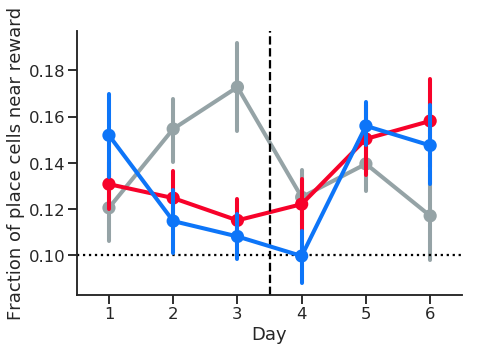

In [56]:
# for direct reward
height,width = 5.,7
g = sns.catplot(x='day_in_df',y='value',hue="grp",
                kind="point",data=df,ci=68,heigth=height, aspect=width/height)

g.ax.axhline(expected_value, linestyle=':', color='k')
g._legend.remove()
g.set(xlabel='Day', ylabel='Fraction of place cells near reward',xticklabels=['1','2','3','4','5','6'])
g.ax.axvline(2.5, linestyle='--', color='k')